## Data Types
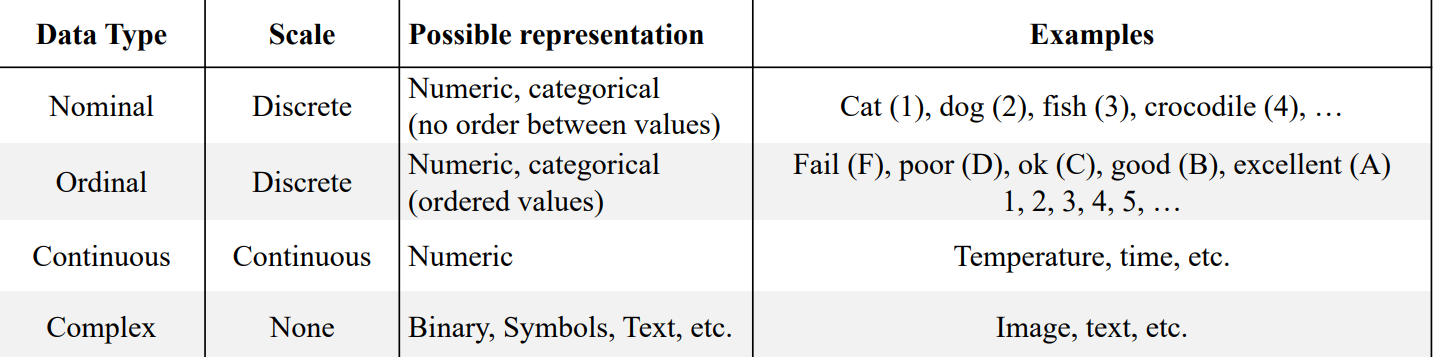
Nominal - 순서가 없는 데이터(ex. 성별) -> 평균치 무의미(원핫인코딩 needed)<br>
Ordinal - 순서가 있는 데이터(ex. 학년) -> 평균치 유의미

In [10]:
import pandas as pd
obj = pd.Series([4, 7, -5, 3], index=[6, 4, 2, 0]) # index가 감소 or 증가하는 순서로 되어있으면 reindex할 때 method='ffill' 사용 가능
print(obj)
obj2 = obj.reindex(range(6), method='ffill')
print(obj2)

6    4
4    7
2   -5
0    3
dtype: int64
0    3
1   -5
2   -5
3    7
4    7
5    4
dtype: int64


In [11]:
obj2.drop([0,3], inplace=True)
obj2

1   -5
2   -5
4    7
5    4
dtype: int64

In [15]:
print(obj2[1], type(obj2[1])) # -5 <class 'numpy.int64'> 하나의 인덱스만 넣으면 값만 나옴
print(obj2[1:3], type(obj2[1:3])) # 4 7 <class 'pandas.core.series.Series'> 나머지 경우에는 Series로 반환
print(obj2[[1]], type(obj2[[1]])) # 4 <class 'pandas.core.series.Series'>

-5 <class 'numpy.int64'>
2   -5
4    7
dtype: int64 <class 'pandas.core.series.Series'>
1   -5
dtype: int64 <class 'pandas.core.series.Series'>


In [26]:
print(obj2.sort_index())
print(obj2.sort_values())

1   -5
2   -5
4    7
5    4
dtype: int64
1   -5
2   -5
5    4
4    7
dtype: int64


In [23]:
population = {'서울': 9700000, '부산': 3500000, '대구': 2500000, '인천': 2800000, '광주': 1500000}
population = pd.Series(population, index=['서울', '부산', '인천', '대구', '광주', '제주'], name='인구')
print(population)
print(population.isnull()) # 결측치 확인 pd.isnull(population)과 동일(notnull도 있음)

서울    9700000.0
부산    3500000.0
인천    2800000.0
대구    2500000.0
광주    1500000.0
제주          NaN
Name: 인구, dtype: float64
서울    False
부산    False
인천    False
대구    False
광주    False
제주     True
Name: 인구, dtype: bool


## DataFrame

In [27]:
data = {'지역': ['서울', '부산', '대구', '인천', '광주'], '년도': [2000, 2001, 2002, 2001, 2002], '인구': [9762546, 3512547, 2517680, 2829827, 1502887]}
df = pd.DataFrame(data, index=['1', '2', '3', '4', '5'], columns=['지역', '년도', '인구', 'GDP'])
df

,지역,년도,인구,GDP
1,서울,2000,9762546,NaN
2,부산,2001,3512547,NaN
3,대구,2002,2517680,NaN
4,인천,2001,2829827,NaN
5,광주,2002,1502887,NaN


In [28]:
df['GDP'] = 100
df.지역 # df['지역']과 동일, df.['지역']은 에러 series로 반환

   지역    년도       인구  GDP
1  서울  2000  9762546  100
2  부산  2001  3512547  100
3  대구  2002  2517680  100
4  인천  2001  2829827  100
5  광주  2002  1502887  100


1    서울
2    부산
3    대구
4    인천
5    광주
Name: 지역, dtype: object

In [34]:
print(df.loc['1']) # 행 인덱스로 접근, series로 반환
print(df.loc[['1']]) # 행 인덱스로 접근, DataFrame으로 반환
print(df.iloc[0]) # 행 번호로 접근, series로 반환
print(df.iloc[[0]]) # 행 번호로 접근, DataFrame으로 반환

지역          서울
년도        2000
인구     9762546
GDP        100
Name: 1, dtype: object
   지역    년도       인구  GDP
1  서울  2000  9762546  100
지역          서울
년도        2000
인구     9762546
GDP        100
Name: 1, dtype: object
   지역    년도       인구  GDP
1  서울  2000  9762546  100


In [35]:
df.reindex(columns=['년도', '지역', '인구', 'GDP'], fill_value=0) # columns 재배열, fill_value로 결측치 채우기

,년도,지역,인구,GDP
1,2000,서울,9762546,100
2,2001,부산,3512547,100
3,2002,대구,2517680,100
4,2001,인천,2829827,100
5,2002,광주,1502887,100


In [36]:
del df['GDP'] # 열 삭제 df.drop('GDP', axis=1, inplace=True)와 동일 * axis에 주의
df

,지역,년도,인구
1,서울,2000,9762546
2,부산,2001,3512547
3,대구,2002,2517680
4,인천,2001,2829827
5,광주,2002,1502887


## DataFrame and Series

- broadcasting<br>
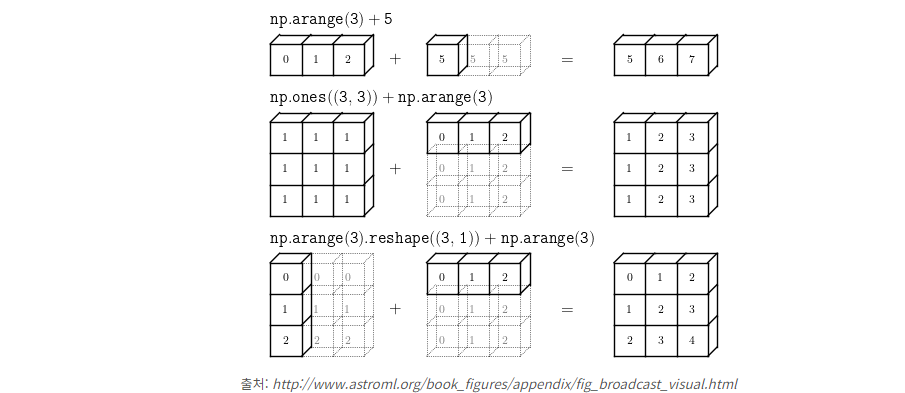<br>
모양이 부족한 부분을 확장하여 계산이 가능하도록 만들어줌

In [38]:
import numpy as np
arr = np.arange(12).reshape((3, 4))
arr - arr[0] # broadcasting

array([[0, 0, 0, 0],
       [4, 4, 4, 4],
       [8, 8, 8, 8]])

In [47]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
print(df.apply(f)) # 열별로 함수 적용 -> 반환값은 새로운 데이터프레임
print(df.applymap(type)) # 원소별로 함수 적용 -> 반환값은 새로운 데이터프레임

     지역    년도       인구
min  광주  2000  1502887
max  인천  2002  9762546
              지역             년도             인구
1  <class 'str'>  <class 'int'>  <class 'int'>
2  <class 'str'>  <class 'int'>  <class 'int'>
3  <class 'str'>  <class 'int'>  <class 'int'>
4  <class 'str'>  <class 'int'>  <class 'int'>
5  <class 'str'>  <class 'int'>  <class 'int'>


In [48]:
df['인구'].map('{:,}'.format) # map은 series에만 사용 가능

1    9,762,546
2    3,512,547
3    2,517,680
4    2,829,827
5    1,502,887
Name: 인구, dtype: object